# Import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import os
from shutil import copyfile

In [3]:
from neuralart.data import *

# Get Data

In [7]:
chan_csv_path = "../raw_data/wikiart/csv_chan"
chan_image_path= "../raw_data/wikiart/dataset_chan"
output_path = "../raw_data/wikiart"
dataset_dir_name = 'dataset'

In [8]:
data_full = get_data(chan_csv_path, chan_image_path, rm_image_duplicate=False)
data_full.shape

(81446, 10)

In [199]:
data = get_data(chan_csv_path, chan_image_path, rm_image_duplicate=True)
data.shape

(78748, 10)

In [10]:
merge_mov1={'name': 'merge_mov1',
            'merging':{'abstract_expressionism': None,
                 'action_painting': None,
                 'analytical_cubism': None,
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': None,
                 'contemporary_realism': None,
                 'cubism': None,
                 'early_renaissance': 'early_renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': None,
                 'high_renaissance': 'high_renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': None,
                 'northern_renaissance': 'northern_renaissance',
                 'pointillism': None,
                 'pop_art': None,
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': None,
                 'ukiyo_e': 'ukiyo_e'}}

In [11]:
for n in [100,1000,None]:
    for s in ['drop','max']:
        for k in [False, True]:
            for c in [merge_mov1, None]:
                get_dataset(data, target="movement", class_=c, n=n, strategy=s, 
                            random_state=123, output_path=output_path, keep_genre=k )


In [12]:
create_dataset_directory(data_full, chan_image_path, output_path, dataset_dir_name)

2500 images copied
5000 images copied
7500 images copied
10000 images copied
12500 images copied
15000 images copied
17500 images copied
20000 images copied
22500 images copied
25000 images copied
27500 images copied
30000 images copied
32500 images copied
35000 images copied
37500 images copied
40000 images copied
42500 images copied
45000 images copied
47500 images copied
50000 images copied
52500 images copied
55000 images copied
57500 images copied
60000 images copied
62500 images copied
65000 images copied
67500 images copied
70000 images copied
72500 images copied
75000 images copied
77500 images copied
80000 images copied
Done: 81446 image(s) copied, 81446 image(s) in the folder


# Data Visualization

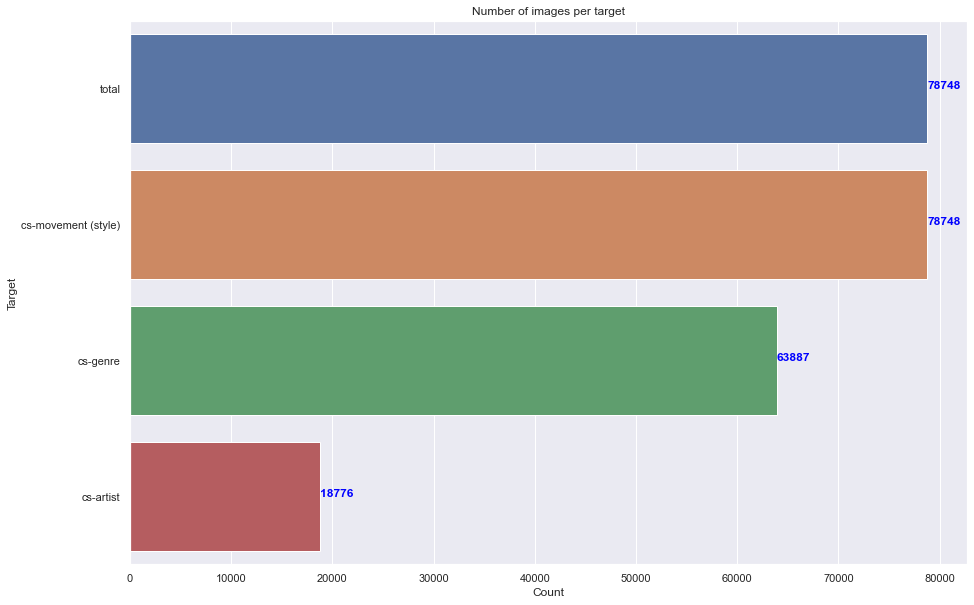

In [13]:
col = ['cs_split_artist','cs_split_genre','cs_split_style','cs_path']

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=data[col].count().index, 
            x=data[col].count().values,
            order=data[col].count().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data[col].count().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_yticklabels(['total','cs-movement (style)','cs-genre','cs-artist']);
ax.set_title("Number of images per target");
ax.set_xlabel("Count");
ax.set_ylabel("Target");

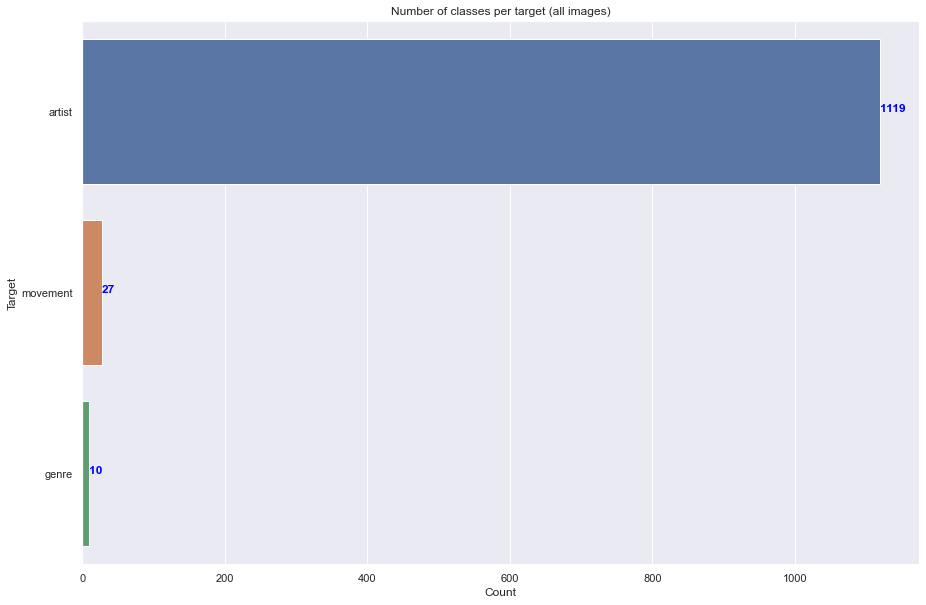

In [14]:
col = ['artist','genre','movement']

fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=data[col].nunique().index, 
            x=data[col].nunique().values,
            order=data[col].nunique().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data[col].nunique().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of classes per target (all images)");
ax.set_xlabel("Count");
ax.set_ylabel("Target");

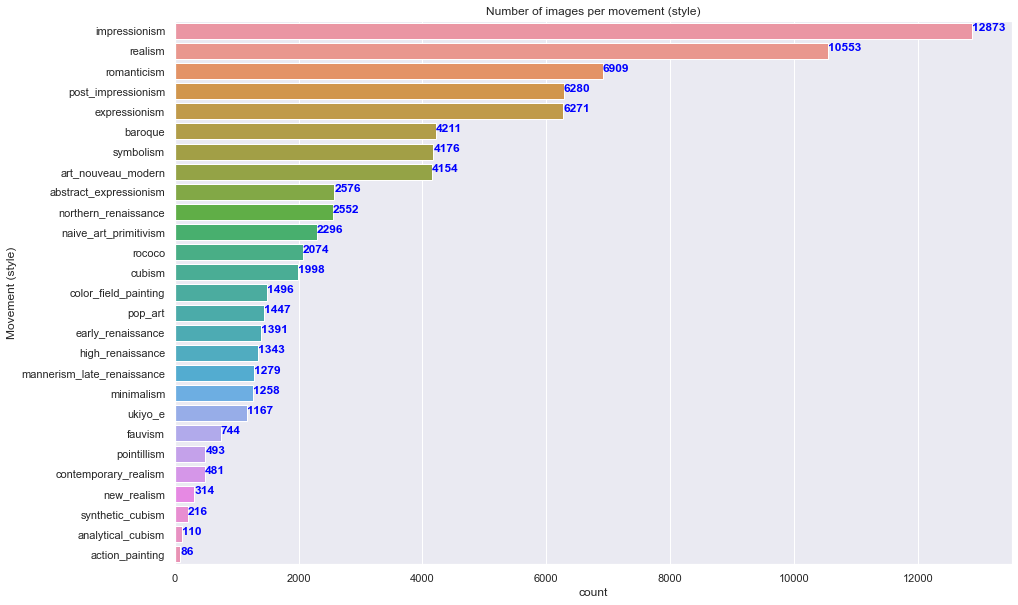

In [15]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data, y="movement", 
              order = data['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per movement (style)");
ax.set_ylabel("Movement (style)");

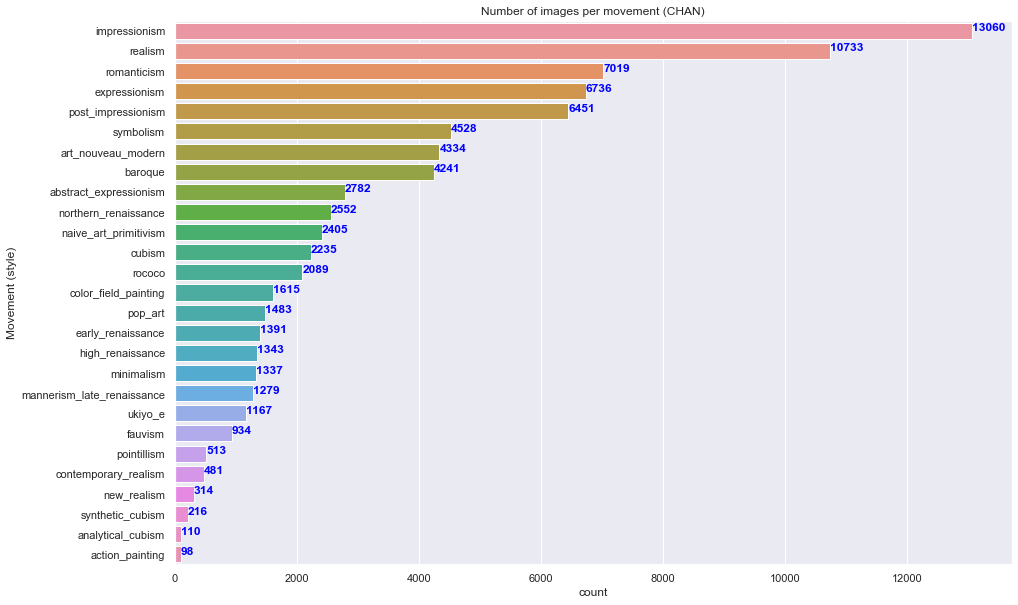

In [16]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data_full, y="movement", 
              order = data_full['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data_full["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per movement (CHAN)");
ax.set_ylabel("Movement (style)");

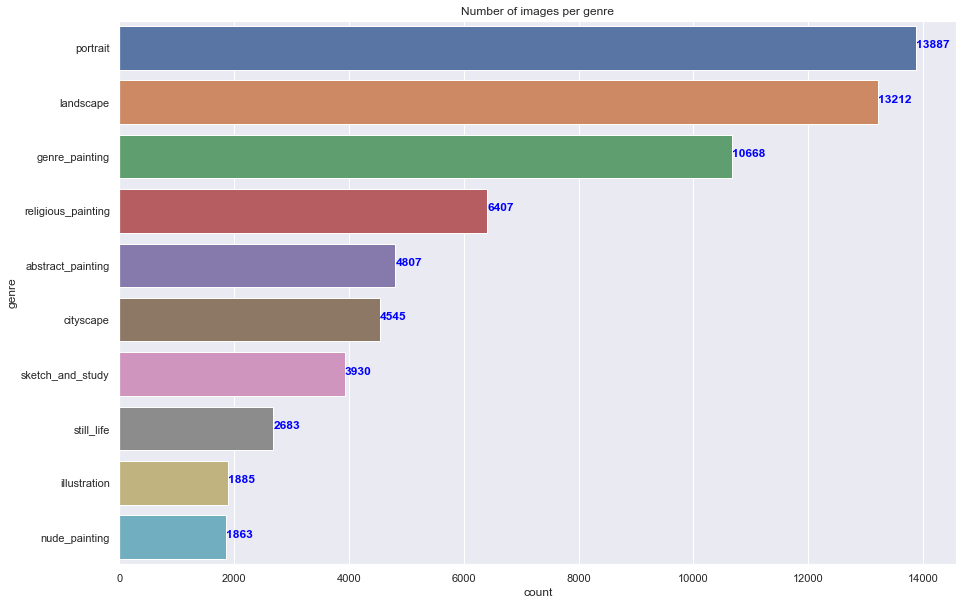

In [17]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data, y="genre", 
              order = data['genre'].value_counts().index,
              ax=ax);

for i, v in enumerate(data["genre"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images per genre");

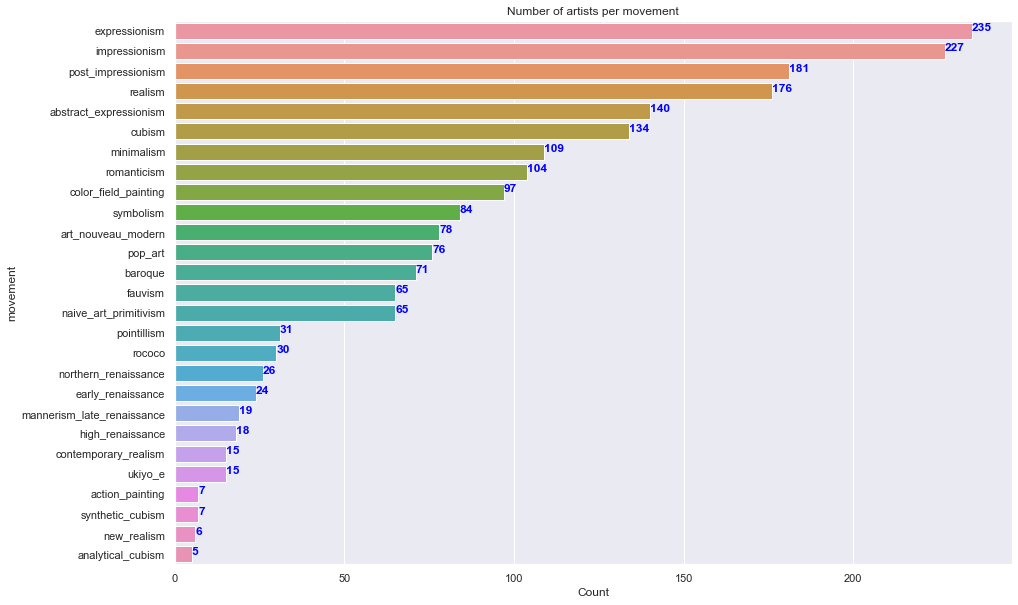

In [18]:
fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.barplot(y=data.groupby("movement").artist.nunique().index, 
            x=data.groupby("movement").artist.nunique().values,
            order=data.groupby("movement").artist.nunique().sort_values(ascending=False).index,
            ax=ax);

for i, v in enumerate(data.groupby("movement").artist.nunique().sort_values(ascending=False).values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of artists per movement");
ax.set_xlabel("Count");

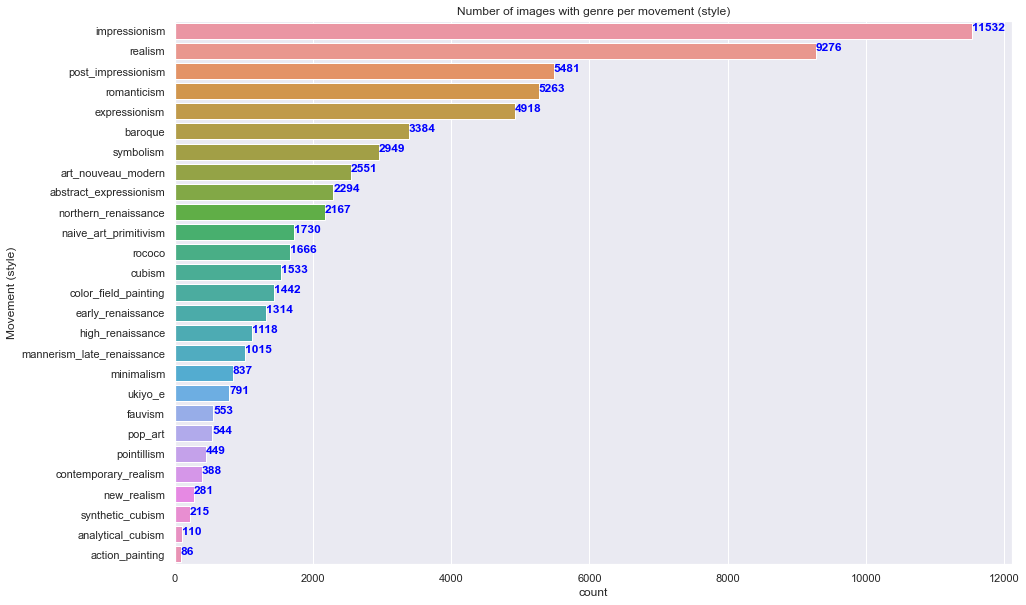

In [19]:
data2 = data[data["cs_split_genre"].notnull()]

fig, ax = plt.subplots(1,1,figsize=(15,10));
sns.countplot(data=data2, y="movement", 
              order = data2['movement'].value_counts().index,
              ax=ax);

for i, v in enumerate(data2["movement"].value_counts().values):
    ax.text(v, i , str(v), color='blue', fontweight='bold')
    
ax.set_title("Number of images with genre per movement (style)");
ax.set_ylabel("Movement (style)");

In [22]:
data[data["cs_split_genre"].notnull()][data["movement"]=="Abstract_Expressionism"].head(100)

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [cs_path, movement, artist, title, cs_file_name, file_name, genre, cs_split_genre, cs_split_style, cs_split_artist]
Index: []

In [184]:
#Quick function to display a sample of the selected database

def show_samples(df,sample_size=10):

    root_path='../raw_data/wikiart/dataset/'
    sample=df.sample(n=sample_size).reset_index()

    fig = plt.figure(constrained_layout=True,figsize=(10,5*sample_size))

    for i in list(range(0,sample_size)):
        artist=sample['artist'][i]
        movement=sample['movement'][i]
        title=sample['title'][i]
        path=root_path+sample['file_name'][i]

        plt.subplot(sample_size,1,i+1)
        image=plt.imread(path)
        label=f'{movement} - {title} by {artist}'
        plt.text(x=10,y=-2,s=label)
        plt.imshow(image)
        plt.axis("off")

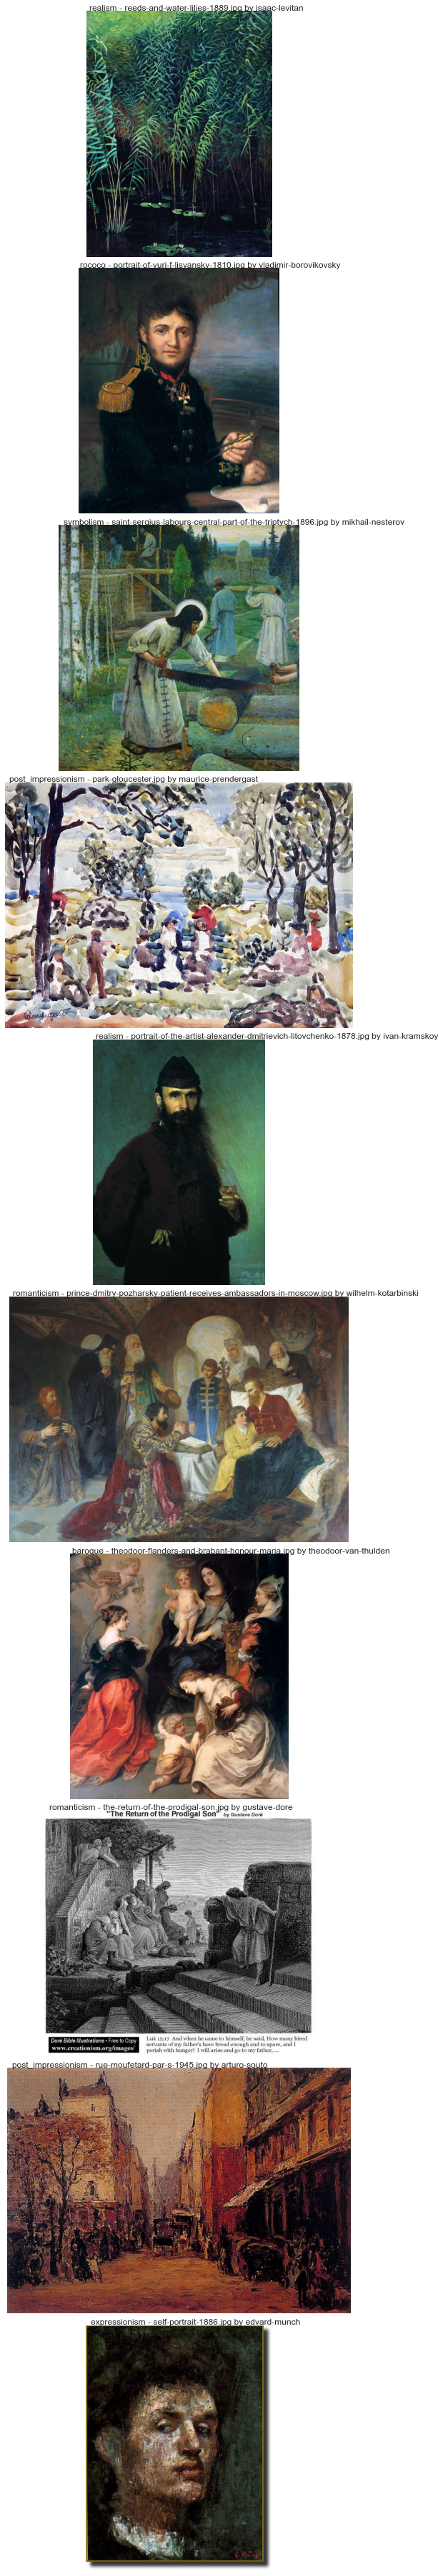

In [187]:
show_samples(df)

# Merge study

## Summary + initial database

**Final list of proposed splits :**

- Merge_test : merge_test : Modèle de test avec seulement 3 mouvements
- Merge1 : merge_mov1 : Modèle facile avec des mouvements très spécifiques, presque uniquement des drops, un seul merge sur renaissance 
- Merge2 : merge_mov2 : Modèle facile, merge d'une partie des mouvements droppés précédements , drop limités 
- Merge3 : merge_mov3 : Modèle complet, merge d'une partie des mouvements droppés précédements , aucun drop hormis duplicatas de Chan
- Merge4 : merge_mov4 : Modèle initial, pas de merge, mouvements de la db de Chan
- Merge5 : merge_mov5 : Modèle plus complet, split sur les mouvements majoritaires par courant/école/nationalité des artistes

**Methodo :**

- General review of movements
- Basic split : movements regroupment / dropping

- Historical Detailed plits : dive into artists specific schools / periods / sub-movements ?
- Technical Detailed split : dive into images specificities ? color balances (could be synonymous of a period for an artist) ? painting format ?

**Database :**

- add regex to scan period min/max

In [66]:
import plotly.express as px

In [236]:
df=data.copy()
df.drop(columns=['cs_split_genre','cs_split_style','cs_split_artist'],inplace=True)

In [201]:
if df['title'].str.extract(r'([0-9]{4})') is not '':
    df['date']=df['title'].str.extract(r'([0-9]{4})').astype(float)

## Movements review

In [188]:
#General function to display synthesis table by movement from a specific dataframe

def df_grouping(df,col='movement'):
    df_mov=df.groupby(by=col).nunique()
    df_mov['Q1_year']=df.groupby(by=col).quantile(0.25)['date'].astype(int)
    df_mov['Q3_year']=df.groupby(by=col).quantile(0.75)['date'].astype(int)
    df_mov['mean_year']=df.groupby(by=col).mean()['date'].astype(int)
    df_mov['duration']=df_mov['Q3_year']-df_mov['Q1_year']
    df_mov['artist_ratio']=round(df_mov['title']/df_mov['artist'],2)
    df_mov.drop(columns=['cs_path','date'],inplace=True)
    df_mov.sort_values(['mean_year'])
    df_mov.reset_index(inplace=True)
    return df_mov

In [190]:
#General function to check duplicates in titles and file_names

def title_duplicates(df,n=20,col_a='title',col_b='file_name'):
    col_a_duplicates=df[col_a].duplicated().sum()
    col_b_duplicates=df[col_b].duplicated().sum()
    duplicate_df=df[df[col_a].duplicated()].groupby(by=col_a).nunique()[col_b].sort_values(ascending=False).reset_index()
    df_out=duplicate_df.head(n)
    
    print(f'Found {col_a_duplicates} in {col_a} ; Found {col_b_duplicates} in {col_b}')
    return df_out

In [205]:
df_mov=df_grouping(df)
#Create dictionnaries to merge movements
mov_dict_init={ i : i for i in df_mov['movement'] }
mov_dict_init

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



{'abstract_expressionism': 'abstract_expressionism',
 'action_painting': 'action_painting',
 'analytical_cubism': 'analytical_cubism',
 'art_nouveau_modern': 'art_nouveau_modern',
 'baroque': 'baroque',
 'color_field_painting': 'color_field_painting',
 'contemporary_realism': 'contemporary_realism',
 'cubism': 'cubism',
 'early_renaissance': 'early_renaissance',
 'expressionism': 'expressionism',
 'fauvism': 'fauvism',
 'high_renaissance': 'high_renaissance',
 'impressionism': 'impressionism',
 'mannerism_late_renaissance': 'mannerism_late_renaissance',
 'minimalism': 'minimalism',
 'naive_art_primitivism': 'naive_art_primitivism',
 'new_realism': 'new_realism',
 'northern_renaissance': 'northern_renaissance',
 'pointillism': 'pointillism',
 'pop_art': 'pop_art',
 'post_impressionism': 'post_impressionism',
 'realism': 'realism',
 'rococo': 'rococo',
 'romanticism': 'romanticism',
 'symbolism': 'symbolism',
 'synthetic_cubism': 'synthetic_cubism',
 'ukiyo_e': 'ukiyo_e'}

In [206]:
df_mov

movement  artist  title  cs_file_name  file_name  genre  \
0       abstract_expressionism     140   2269          2576       2576     10   
1              action_painting       7     84            86         86      1   
2            analytical_cubism       5    109           110        110      6   
3           art_nouveau_modern      78   4128          4154       4154      9   
4                      baroque      71   4055          4211       4211     10   
5         color_field_painting      97   1404          1496       1496      2   
6         contemporary_realism      15    480           481        481      8   
7                       cubism     134   1944          1998       1998     10   
8            early_renaissance      24   1322          1391       1391      7   
9                expressionism     235   5940          6271       6271     10   
10                     fauvism      65    727           744        744      9   
11            high_renaissance      18   1304          1343       1343      8   
12               impressionism     227  12488         12873      12873      9   
13  mannerism_late_renaissance      19   1215          1279       1279      8   
14                  minimalism     109   1154          1258       1258      2   
15       naive_art_primitivism      65   2251          2296       2296     10   
16                 new_realism       6    306           314        314      7   
17        northern_renaissance      26   2429          2552       2552      9   
18                 pointillism      31    493           493        493      8   
19                     pop_art      76   1425          1447       1447     10   
20          post_impressionism     181   6116          6280       6280     10   
21                     realism     176  10284         10553      10553      9   
22                      rococo      30   2053          2074       2074      9   
23                 romanticism     104   6831          6909       6909      9   
24                   symbolism      84   4126          4176       4176     10   
25            synthetic_cubism       7    213           216        216      7   
26                     ukiyo_e      15   1084          1167       1167      9   

    Q1_year  Q3_year  mean_year  duration  artist_ratio  
0      1958     1983       1969        25         16.21  
1      1950     1959       1955         9         12.00  
2      1910     1912       1910         2         21.80  
3      1900     1916       1907        16         52.92  
4      1630     1659       1647        29         57.11  
5      1963     1980       1971        17         14.47  
6      1970     1991       2002        21         32.00  
7      1914     1939       1929        25         14.51  
8      1448     1480       1464        32         55.08  
9      1913     1946       1948        33         25.28  
10     1907     1956       1930        49         11.18  
11     1504     1518       1511        14         72.44  
12     1881     1909       1897        28         55.01  
13     1542     1578       1558        36         63.95  
14     1965     1987       1987        22         10.59  
15     1929     1966       1946        37         34.63  
16     1908     1928       1924        20         51.00  
17     1490     1522       1502        32         93.42  
18     1888     1905       1897        17         15.90  
19     1965     1986       2002        21         18.75  
20     1889     1924       1909        35         33.79  
21     1874     1899       1887        25         58.43  
22     1748     1784       1764        36         68.43  
23     1827     1874       1849        47         65.68  
24     1901     1927       1913        26         49.12  
25     1913     1917       1915         4         30.43  
26     1820     1856       1839        36         72.27

In [149]:
#Print original movements
fig =px.scatter(df_mov,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig.update_traces(textposition='top center')
fig.update_layout(title='Movements Initial Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig.show()

##### TO DO

Add analysis from country origin by artists or even more detailed artist data

## Basic splits

**Merge_test :** 

Modèle de test avec seulement 3 mouvements bien distincts et une bonne taille de dataset :


In [204]:
merge_test={'abstract_expressionism': None,
                 'action_painting': None,
                 'analytical_cubism': None,
                 'art_nouveau_modern': None,
                 'baroque': None,
                 'color_field_painting': None,
                 'contemporary_realism': None,
                 'cubism': 'cubism',
                 'early_renaissance': None,
                 'expressionism': None,
                 'fauvism': None,
                 'high_renaissance': None,
                 'impressionism': None,
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': None,
                 'new_realism': None,
                 'northern_renaissance': None,
                 'pointillism': None,
                 'pop_art': None,
                 'post_impressionism': None,
                 'realism': None,
                 'rococo': None,
                 'romanticism': None,
                 'symbolism': None,
                 'synthetic_cubism': None,
                 'ukiyo_e': 'ukiyo_e'}
df_mov_test=df_grouping(df.replace(merge_test.keys(),merge_test.values()))
df_mov_test.shape

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(3, 11)

In [151]:
fig_test =px.scatter(df_mov_test,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig_test.update_traces(textposition='top center')
fig_test.update_layout(title='Movements Merge_Test Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig_test.show()

**Merge1 :** 

Modèle facile avec des mouvements très spécifiques, presque uniquement des drops, un seul merge sur renaissance :
- Bonne taille de dataset : drop des mouvements avec moins de 1000 paintings
- Artist ratio élevé : plus d'exemples par artistes pour fitter drop si <25
- merge unique :
        Renaissance=['Early_Renaissance','High_Renaissance','Northern_Renaissance']

In [100]:
merge_mov1={'abstract_expressionism': None,
                 'action_painting': None,
                 'analytical_cubism': None,
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': None,
                 'contemporary_realism': None,
                 'cubism': 'cubism',
                 'early_renaissance': 'renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': None,
                 'high_renaissance': 'renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': None,
                 'northern_renaissance': 'renaissance',
                 'pointillism': None,
                 'pop_art': None,
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': None,
                 'ukiyo_e': 'ukiyo_e'}
df_mov1=df_grouping(df.replace(merge_mov1.keys(),merge_mov1.values()))
df_mov1.shape

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(14, 11)

In [89]:
fig1 =px.scatter(df_mov1,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig1.update_traces(textposition='top center')
fig1.update_layout(title='Movements Merge1 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig1.show()

**Merge2 :**

Modèle facile, merge d'une partie des mouvements droppés précédements , drop limités :

- Bonne taille de dataset : drop des mouvements avec moins de 1000 paintings
- Artist ratio modéré: plus d'exemples par artistes pour fitter drop si <15
- Merging des mouvements sous représentés par proximité
        Abstract=['Abstract_Expressionism','Action_painting']
        Cubism=['Analytical_Cubism','Cubism','Synthetic_Cubism']
        Renaissance=['Early_Renaissance','High_Renaissance','Northern_Renaissance']
        New_Realism=['Contemporary_Realism','New_Realism']

In [95]:

merge_mov2={'abstract_expressionism': 'abstract',
                 'action_painting': 'abstract',
                 'analytical_cubism': 'cubism',
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': None,
                 'contemporary_realism': 'new_realism',
                 'cubism': 'cubism',
                 'early_renaissance': 'renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': None,
                 'high_renaissance': 'renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': None,
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': 'new_realism',
                 'northern_renaissance': 'renaissance',
                 'pointillism': None,
                 'pop_art': 'pop_art',
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': 'cubism',
                 'ukiyo_e': 'ukiyo_e'}
df_mov2=df_grouping(df.replace(merge_mov2.keys(),merge_mov2.values()))
df_mov2.shape


/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(17, 11)

In [96]:
fig2 =px.scatter(df_mov2,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig2.update_traces(textposition='top center')
fig2.update_layout(title='Movements Merge2 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig2.show()

**Merge3 :**

Modèle complet, merge d'une partie des mouvements droppés précédements , auncun drop hormis duplicatas de Chan:

    - Merge des mouvements à taille limitée (<500 oeuvres) selon la même méthodo que le Merge2
    - Mouvements majeur (impressionisme / realisme / Romantisme) : pas de split par auteurs/écoles/pays

In [98]:

merge_mov3={'abstract_expressionism': 'abstract',
                 'action_painting': 'abstract',
                 'analytical_cubism': 'cubism',
                 'art_nouveau_modern': 'art_nouveau_modern',
                 'baroque': 'baroque',
                 'color_field_painting': 'color_field_painting',
                 'contemporary_realism': 'new_realism',
                 'cubism': 'cubism',
                 'early_renaissance': 'renaissance',
                 'expressionism': 'expressionism',
                 'fauvism': 'fauvism',
                 'high_renaissance': 'renaissance',
                 'impressionism': 'impressionism',
                 'mannerism_late_renaissance': 'mannerism_late_renaissance',
                 'minimalism': 'minimalism',
                 'naive_art_primitivism': 'naive_art_primitivism',
                 'new_realism': 'new_realism',
                 'northern_renaissance': 'renaissance',
                 'pointillism': 'pointillism',
                 'pop_art': 'pop_art',
                 'post_impressionism': 'post_impressionism',
                 'realism': 'realism',
                 'rococo': 'rococo',
                 'romanticism': 'romanticism',
                 'symbolism': 'symbolism',
                 'synthetic_cubism': 'cubism',
                 'ukiyo_e': 'ukiyo_e'}
df_mov3=df_grouping(df.replace(merge_mov3.keys(),merge_mov3.values()))
df_mov3.shape

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



(21, 11)

In [99]:
fig3 =px.scatter(df_mov3,x='mean_year',y='artist_ratio',size='title',text='movement',
               hover_name="movement",color="title",size_max=30,color_continuous_scale='jet')
fig3.update_traces(textposition='top center')
fig3.update_layout(title='Movements Merge3 Split',
    xaxis={'title':'Mean Year'},
    yaxis={'title':'Artist Ratio - Painting per Artist'})

fig3.show()

## By Artist

- check artist vs movement (identification by artist ?)
- does an artist have several movements ?
- check Impressionism split by artists

In [59]:
df_artist=data_full.groupby(by='artist').nunique()
df_artist.head()


df_impr=data_full[data_full.movement.isin(['Impressionism'])]

df_impr.describe()

cs_path movement artist title cs_file_name file_name genre  \
count        0        0      0     0            0         0     0   
unique       0        0      0     0            0         0     0   
top        NaN      NaN    NaN   NaN          NaN       NaN   NaN   
freq       NaN      NaN    NaN   NaN          NaN       NaN   NaN   

       cs_split_genre cs_split_style cs_split_artist  
count               0              0               0  
unique              0              0               0  
top               NaN            NaN             NaN  
freq              NaN            NaN             NaN

## By Genre

- check genre general distribution
- check genre distribution by movements or century

In [202]:
#General function to display synthesis table by movement from a specific dataframe
if df['title'].str.extract(r'([0-9]{4})') is not '':
    df['date']=df['title'].str.extract(r'([0-9]{4})').astype(float)
df_gnd=df_grouping(df,col='genre')

df_gnd

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.

/usr/local/Caskroom/miniforge/base/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



genre  movement  artist  title  cs_file_name  file_name  \
0   abstract_painting        15     277   4209          4807       4807   
1           cityscape        24     367   4403          4545       4545   
2      genre_painting        24     578  10330         10668      10668   
3        illustration        19      96   1865          1885       1885   
4           landscape        24     541  12689         13212      13212   
5       nude_painting        22     296   1710          1863       1863   
6            portrait        24     690  13331         13887      13887   
7  religious_painting        18     295   5767          6407       6407   
8    sketch_and_study        24     310   3886          3930       3930   
9          still_life        22     339   2485          2683       2683   

   Q1_year  Q3_year  mean_year  duration  artist_ratio  
0     1960     1981       1974        21         15.19  
1     1884     1921       1906        37         12.00  
2     1877     1914       1879        37         17.87  
3     1896     1923       1930        27         19.43  
4     1879     1919       1894        40         23.45  
5     1901     1930       1912        29          5.78  
6     1850     1915       1855        65         19.32  
7     1495     1698       1619       203         19.55  
8     1881     1910       1863        29         12.54  
9     1900     1937       1911        37          7.33

In [386]:
#Fonction pour visualiser les décomptes groupés de deux features (genre et mouvement par défaut)


def cross_count_df(df,row='movement',col='genre',axis=None):
    
    """
    Return a tuple made of a df and its viz matrix
    
    axis = None : heatmap on all dataframe count
    axis = 0 : heatmap by colums count (genre as default value)
    axis = 1 : heatmap by row count (movement as default value)

    
    """
    
    from sklearn.preprocessing import OneHotEncoder

    ohe=OneHotEncoder(sparse = False)
    ohe.fit(df[[col]]) # Fit encoder
    cat_encoded = ohe.transform(df[[col]]) # Encode category (genre by default)

    cat_list=list(ohe.categories_[0])

    for i in cat_list:   # Transpose encoded genre back into dataframe
        index=cat_list.index(i)
        df[i]=cat_encoded.T[index]

    df_out=df.groupby(by=row).sum()[cat_list]
    
    return df_out , df_out.style.background_gradient(axis=axis).format(precision=0)

In [443]:
df_gnd[0].sum()

abstract_painting      4807.0
cityscape              4545.0
genre_painting        10668.0
illustration           1885.0
landscape             13212.0
nude_painting          1863.0
portrait              13887.0
religious_painting     6407.0
sketch_and_study       3930.0
still_life             2683.0
dtype: float64

In [444]:
df_gnd=cross_count_df(df,axis=0)
df_gnd[1]

##### Genre distribution :
- set des genres les plus représentés
    ['genre_painting', 'landscape', 'portrait']
- set de genres avec une forte majeure dans un ou plusieurs mouvements
    ['abstract_painting','cityscape','landscape','sketch_and_study']
- set de genres reparti de façon homogène dans plusieurs mouvements (forte diversité de style)
    ['genre_painting','religious_painting','portrait','still_life']
- tous les genres

In [ ]:
merg_gen1={'name': 'merge_gen1',
            'merging'={'abstract_painting':None,
                       'cityscape':None,
                       'genre_painting':'genre_painting',
                       'illustration':None,
                       'landscape':'landscape',
                       'nude_painting':None,
                       'portrait':'portrait',
                       'religious_painting':None,
                       'sketch_and_study':None,
                       'still_life':None}
          }

merg_gen2={'name': 'merge_gen2',
            'merging'={'abstract_painting':'abstract_painting',
                       'cityscape':'cityscape',
                       'genre_painting':None,
                       'illustration':None,
                       'landscape':'landscape',
                       'nude_painting':None,
                       'portrait':None,
                       'religious_painting':None,
                       'sketch_and_study':'sketch_and_study',
                       'still_life':None}
          }

merg_gen3={'name': 'merge_gen3',
            'merging'={'abstract_painting':None,
                       'cityscape':None,
                       'genre_painting':'genre_painting',
                       'illustration':None,
                       'landscape':None,
                       'nude_painting':None,
                       'portrait':'portrait',
                       'religious_painting':'religious_painting',
                       'sketch_and_study':None,
                       'still_life':'still_life'}
          }

merg_gen4={'name': 'merge_gen4',
            'merging'={'abstract_painting':'abstract_painting',
                       'cityscape':'cityscape',
                       'genre_painting':'genre_painting',
                       'illustration':'illustration',
                       'landscape':'landscape',
                       'nude_painting':'nude_painting',
                       'portrait':'portrait',
                       'religious_painting':'religious_painting',
                       'sketch_and_study':'sketch_and_study',
                       'still_life':'still_life'}
          }